In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/sternadi/home/volume2/noam/SternLab')
from blast_utilities import blast_to_df
from freqs_utilities import estimate_insertion_freq, compatibilty_old_to_new

In [79]:
COLORS = {'T1764.0-':'#F50202', 'A1664.0G':'#F49D09', 'A535.0G':'#5EC0D2', 'T1440.0C':'#F1F87A', 'T1440.0G':'#C4A0E4', 'A1443.0G':'#FE1D1D', 'A1611.0G':'#327CFD', 'C1724.0T':'#8FD95A', 'A1744.0G':'#FBB3DD', 'G1560.0A':'#A7F0A2', 'G1906.0A':'#A3A3A3', 'C3358.0T':'#26451C', 'G3114.0A':'#B37A42', 'A1770.0G':'#7603BA', 'G2310.0A':'#033E86', 'A2626.0G':'#8FD95A', 'C3299.0T':'#211785', 'C1718.0T':'#DFC236', 'T862.0C':'#880E05', 'A2790.0T':'#DF36C6', 'G1736.0A':'#CFFD2F', 'C1549.0T':'#2CA403', 'G531.0A':'#972FFE', 'C1050.0T':'#13B908', 'G1560.0A':'#B5FE84', 'G1688.0T':'#1B0398','A2356.0G':'#830276', 'T170.0A':'#C60DC3', 'A1673.0G':'#E2D492', 'C2859.0T':'#B3FD04', 'G20.0-':'black', 'T21.0C':'grey'}
n = list(range(30)) + list(range(3539, 3570))


In [62]:
df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/moran_nov20_24.12.20-219203985/python_pipeline/freqs/all_freqs.csv')
df['Full_mutation'] = df.ref_base + df.ref_position.astype(str) + df.base



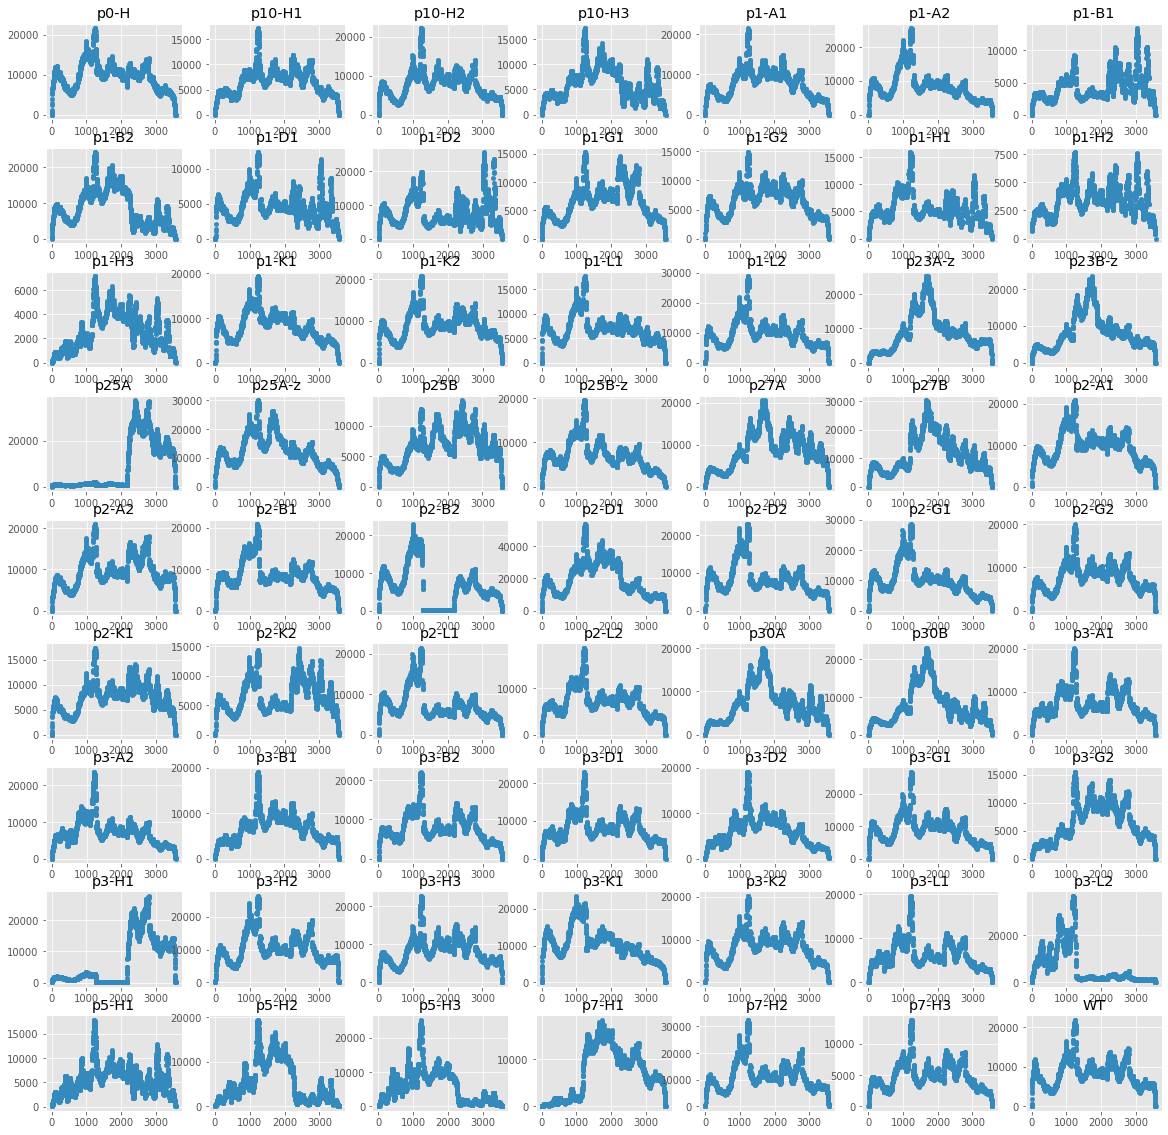

In [82]:
# check coverages
fig, ax = plt.subplots(9,7)
ax = ax.flatten()
i = 0
for f in df[['File']].drop_duplicates().File.tolist():
    df[(df.File == f) & (df.ref_base == df.base) & (df.ref_base != '-')].plot(x='ref_position', y='coverage', ax=ax[i], kind='scatter')
    ax[i].set_title(f)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].set_yscale('log')
    i += 1
fig.set_size_inches(20,20)
fig.subplots_adjust(hspace=0.3)

In [11]:
.File.drop_duplicates()


0            p0-H
21705      p10-H1
42465      p10-H2
62580      p10-H3
247410      p1-H1
267810      p1-H2
286975      p1-H3
1041865     p3-H1
1062160     p3-H2
1083155     p3-H3
1186795     p5-H1
1206260     p5-H2
1225790     p5-H3
1245570     p7-H1
1266525     p7-H2
1287335     p7-H3
Name: File, dtype: object

/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series k

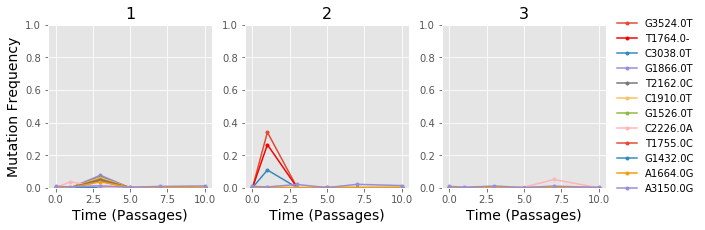

In [38]:
# only moi 10

def create_mutations_graph(df, mutations_list, output_path, title=None):
    """
    This function gets a df of freq files, a list of mutations and a path to save graph to.
    """
    plt.style.use('ggplot')
    fig, axes = plt.subplots(nrows=1, ncols=3)
    axes = axes.flatten()
    for sample, a in zip(['1','2','3'], axes):
                df_line = df[(df.Replicate == sample) | (df.File == 'p0-H')]
                df_line = df_line.sort_values('Passage')
                for m in mutations_list:
                    df_line_mutation = df_line[df.Full_mutation == m].sort_values('Passage')
                    if m in COLORS:
                        a.plot('Passage', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m, color=COLORS[m])
                    else:
                        a.plot('Passage', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m)
                a.set_title(sample, fontsize=16)
                a.set_xlabel('Time (Passages)', fontsize=14, color='black')
                a.set_ylim(0,1)
    axes[0].set_ylabel('Mutation Frequency', fontsize=14, color='black')
    fig.set_size_inches(10, 3)
    if title:
        fig.set_title(title)
    #plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, facecolor='white', edgecolor='white')
    plt.savefig(output_path, bbox_inches='tight', dpi=800)
    plt.show()
    return

df_moi10 = df[df.File.str.contains('H')].copy()
df_moi10['Replicate'] = df_moi10.File.str.split('-').str[1].str.replace('H', '')
df_moi10['Passage'] = df_moi10.File.str.split('-').str[0].str.replace('p', '')
df_moi10['Passage'] = df_moi10['Passage'].astype(int)

mutations = df_moi10[(df_moi10.base != df_moi10.ref_base) & (df_moi10.ref_base != '-') & (df_moi10.frequency >= 0.02) & (df_moi10.ref_position > 30) & (df_moi10.ref_position < 3539)].sort_values('frequency', ascending=False).Full_mutation.unique().tolist()
create_mutations_graph(df_moi10, mutations, '/sternadi/home/volume2/noam/ms2/moi10/mutations_over_time.png')




In [37]:
df_moi10[(df_moi10.Full_mutation == 'T1764.0-')]

,ref_position,base,ref_base,base_counter,coverage,frequency,probability,rank,File,Full_mutation,Replicate,Passage
10869,1764.0,-,T,0,11099,0.000000,-0.00,4,p0-H,T1764.0-,,0
31954,1764.0,-,T,0,8068,0.000000,-0.00,4,p10-H1,T1764.0-,1,10
52429,1764.0,-,T,0,10330,0.000000,-0.00,4,p10-H2,T1764.0-,2,10
72779,1764.0,-,T,0,10252,0.000000,-0.00,4,p10-H3,T1764.0-,3,10
257849,1764.0,-,T,0,5142,0.000000,-0.00,4,p1-H1,T1764.0-,1,1
277256,1764.0,-,T,1154,4360,0.264679,1.00,1,p1-H2,T1764.0-,2,1
296499,1764.0,-,T,0,4517,0.000000,-0.00,4,p1-H3,T1764.0-,3,1
1051269,1764.0,-,T,0,14,0.000000,-0.00,4,p3-H1,T1764.0-,1,3
1072638,1764.0,-,T,1,10273,0.000097,0.63,3,p3-H2,T1764.0-,2,3
1093624,1764.0,-,T,0,10432,0.000000,-0.00,4,p3-H3,T1764.0-,3,3


In [40]:
df_moi10 = estimate_insertion_freq(df_moi10)

/sternadi/home/volume2/noam/SternLab/freqs_utilities.py:547: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  insertions['rounded_pos'] = insertions.ref_position.astype(int).astype(float)


In [45]:
df_moi10[(df_moi10.estimated_freq > 0.1)].groupby('Full_mutation').estimated_read_count.max().sort_values()

Full_mutation
-1784.1T       9.0
-1784.1A       9.0
-9.1T          9.0
-1783.1T      10.0
-1799.1G      12.0
-2076.1A      12.0
-1815.1T      12.0
-1818.1T      12.0
-1821.1T      12.0
-1821.2C      12.0
-1824.1A      12.0
-2058.1G      13.0
-1897.1T      13.0
-1777.1A      14.0
-2083.1C      14.0
-1827.1T      14.0
-1830.1T      14.0
-1837.1A      14.0
-1841.1T      14.0
-1827.1A      14.0
-2055.1G      14.0
-1883.1T      14.0
-1886.1T      14.0
-2032.1T      14.0
-1470.1G      14.0
-2168.1G      15.0
-2164.1G      15.0
-1796.1G      15.0
-2029.1T      15.0
-1466.1A      15.0
             ...  
-2020.1A      23.0
-1398.1C      23.0
-1299.1C      24.0
-1329.1T      24.0
-1711.1A      24.0
-1708.1A      24.0
-1364.1T      25.0
-1364.2C      25.0
-1313.1C      26.0
-1326.1T      26.0
-2017.1A      27.0
-1691.1C      27.0
-1694.1C      27.0
-1370.1A      28.0
-1346.1T      29.0
-1672.1A      29.0
-1621.1T      29.0
-1676.1A      30.0
-1349.1T      30.0
-1303.2T      32.0
-1303.1C      32.

In [57]:
df[(~df.File.str.contains('-')) & (df.File != 'WT')].File.drop_duplicates().str[-1]



437940    25
483285    25
525895    27
548450    27
832170    30
853395    30
Name: File, dtype: int64

In [74]:
### continues moi 1 passsages
df_old = pd.read_csv('/sternadi/home/volume2/noam/ms2/passages/201909/all_freqs.csv')
df_old = compatibilty_old_to_new(df_old)


/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



['A1664.0G', 'T1764.0-', 'C2859.0T', 'A535.0G', 'C1718.0T', 'G3114.0A', 'A1744.0G', 'C1549.0T', 'G1560.0A', 'C1811.0T', 'G1688.0T', 'T1621.0A', 'G1906.0A', 'T1440.0C', 'A1673.0G', 'T170.0A', 'C3299.0T', 'G2317.0A', 'C3378.0T', 'C224.0T', 'A1611.0G', 'C206.0T', 'C2226.0A', 'T323.0A', 'G1554.0A', 'A2356.0G']


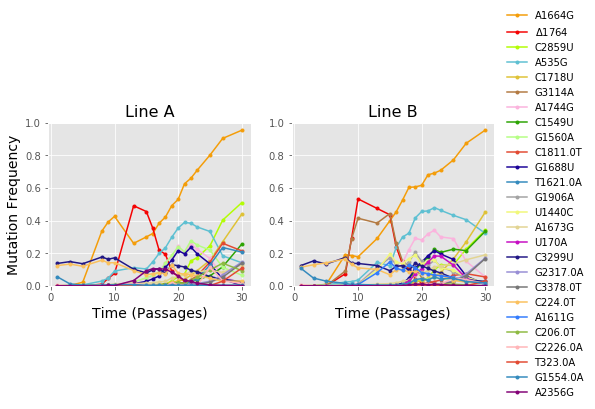

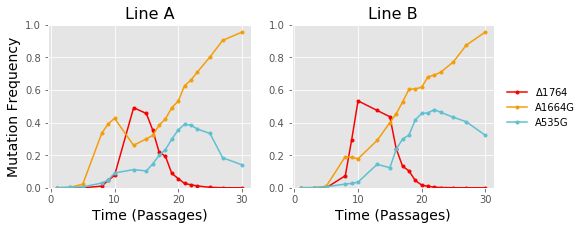

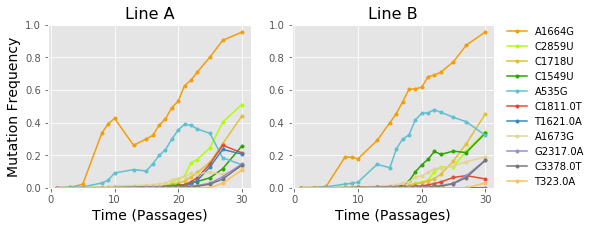

In [104]:

def create_mutations_graph(df, mutations_list, output_file, title=None):
    """
    This function gets a df of freq files, a list of mutations and a path to save graph to.
    """
    plt.style.use('ggplot')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes = axes.flatten()
    for sample, a in zip(['37A', '37B'], axes):
                df_line = df[(df.Replica==sample[-1]) & (df.Degree==int(sample[:2]))]
                df_line = df_line.sort_values('Time')
                for m in mutations_list:
                    df_line_mutation = df_line[(df_line.ref_position == float(m[1:-1])) & (df_line.base == m[-1])].sort_values('Time')
                    if m in COLORS:
                        a.plot('Time', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m.replace('.0', '').replace('T', 'U').replace('U1764-', '$\Delta$1764'), color=COLORS[m])
                    else:
                        a.plot('Time', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m)
                a.set_ylim(top=1, bottom=0)
                a.set_yticks([0.0,0.2,0.4,0.6,0.8,1])
                a.set_title('Line ' + sample.replace('37', ''), fontsize=16)
                a.set_xlabel('Time (Passages)', fontsize=14, color='black')
                a.set_ylabel('Mutation Frequency', fontsize=14, color='black')
                #a.minorticks_on()
                #a.grid(which='minor', alpha=0.2)
                #a.grid(which='major', alpha=0.7)
                #a.set_xticks([1,3,5,7,9,11,13,15])
    a.set_ylabel('', fontsize=14)
    fig.set_size_inches(8, 3)
    if title:
        fig.set_title(title)
    #plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, facecolor='white', edgecolor='white')
    plt.savefig(output_file, bbox_inches='tight', dpi=800)
    plt.show()
    return

new_passages = df[(~df.File.str.contains('-')) & (df.File != 'WT')].copy()
new_passages['Time'] = new_passages[(~new_passages.File.str.contains('-')) & (new_passages.File != 'WT')].File.str[1:-1].astype(int)
new_passages['Replica'] = new_passages[(~new_passages.File.str.contains('-')) & (new_passages.File != 'WT')].File.str[-1]
new_passages['Degree'] = 37
new_passages.rename(columns={'File':'Sample'}, inplace=True)

joined = pd.concat([df_old, new_passages])
joined = joined[~joined.Time.isin([11,12,14])]
mutations = joined[(~joined.ref_position.isin(n)) & (joined.base != joined.ref_base) & (joined.ref_base != '-') & (joined.frequency >= 0.1)].sort_values('frequency', ascending=False).Full_mutation.unique().tolist()
print(mutations)
create_mutations_graph(joined, mutations, '/sternadi/home/volume2/noam/ms2/passages/2020/mutation_over_time.png')

create_mutations_graph(joined, ['T1764.0-', 'A1664.0G', 'A535.0G'], '/sternadi/home/volume2/noam/ms2/passages/2020/mutation_over_time.players.png')

mutations = joined[(~joined.ref_position.isin(n)) & (joined.base != joined.ref_base) & (joined.ref_base != '-') & (joined.frequency >= 0.1) & (joined.Time == 30)].sort_values('frequency', ascending=False).Full_mutation.unique().tolist()
create_mutations_graph(joined, mutations, '/sternadi/home/volume2/noam/ms2/passages/2020/mutation_over_time.30_over_10.png')


In [157]:
### competitions
old_competitions = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/sep20200924-199043845/pipelines/freqs/all_freqs.csv')
old_competitions = old_competitions[~old_competitions.File.str.contains('-')]
old_competitions['Time'] = 0
old_competitions['Line'] = old_competitions.File
new_competitions = df[(df.File.str.contains('-A')) | (df.File.str.contains('-B')) | (df.File.str.contains('-D')) | (df.File.str.contains('-G')) | (df.File.str.contains('-K')) | (df.File.str.contains('-L'))].copy()
new_competitions['Time'] = new_competitions.File.str[1].astype(int)
new_competitions['Replicate'] = new_competitions.File.str[-1].astype(int)
new_competitions['Line'] = new_competitions.File.str[-2]

In [158]:
competitions = pd.concat([old_competitions, new_competitions])
competitions['Full_mutation'] = competitions.ref_base + competitions.ref_position.astype(str) + competitions.base


/powerapps/share/python-anaconda-3.2019.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


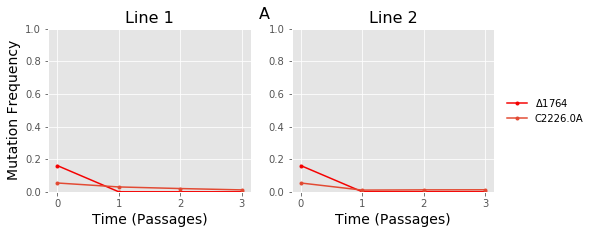

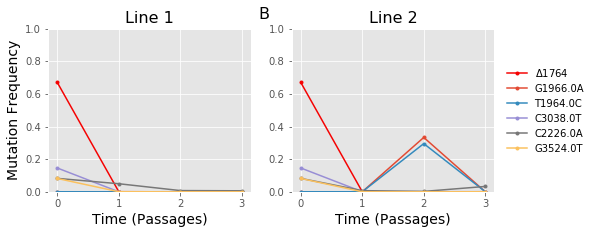

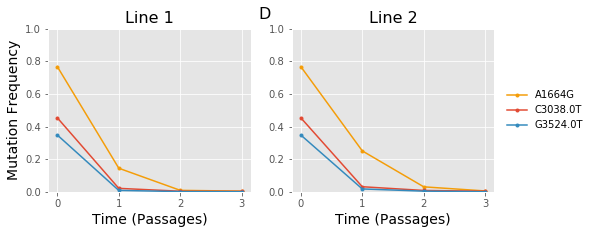

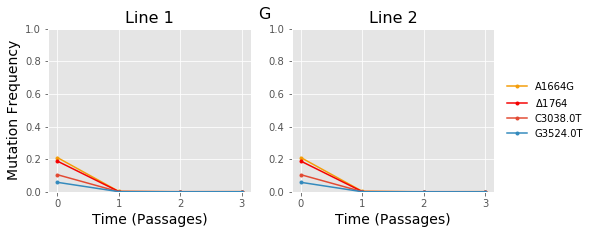

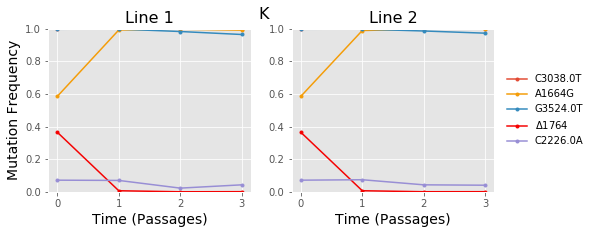

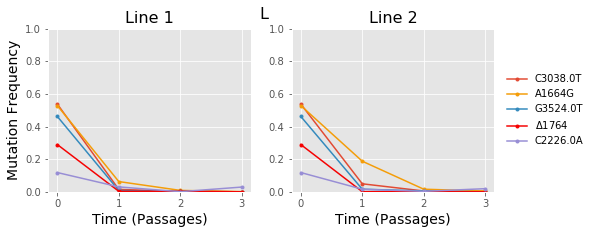

In [169]:
def create_mutations_competitions_graph(df, mutations_list, output_file, title=None):
    """
    This function gets a df of freq files, a list of mutations and a path to save graph to.
    """
    plt.style.use('ggplot')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes = axes.flatten()
    for sample, a in zip([1, 2], axes):
                df_line = df[(df.Replicate == sample) | (df.Replicate.isna())]
                df_line = df_line.sort_values('Time')
                for m in mutations_list:
                    df_line_mutation = df_line[df_line.Full_mutation == m].sort_values('Time')
                    if m in COLORS:
                        a.plot('Time', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m.replace('.0', '').replace('T', 'U').replace('U1764-', '$\Delta$1764'), color=COLORS[m])
                    else:
                        a.plot('Time', 'frequency', data = df_line_mutation, linestyle='-', marker='.', label = m)
                a.set_ylim(top=1, bottom=0)
                a.set_title('Line ' + str(sample), fontsize=16)
                a.set_xlabel('Time (Passages)', fontsize=14, color='black')
                a.set_ylabel('Mutation Frequency', fontsize=14, color='black')
                #a.minorticks_on()
                #a.grid(which='minor', alpha=0.2)
                #a.grid(which='major', alpha=0.7)
                #a.set_xticks([1,3,5,7,9,11,13,15])
    a.set_ylabel('', fontsize=14)
    fig.set_size_inches(8, 3)
    if title:
        fig.suptitle(title, fontsize=16)
    #plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, facecolor='white', edgecolor='white')
    plt.savefig(output_file, bbox_inches='tight', dpi=800)
    plt.show()
    return

for c in ['A', 'B', 'D', 'G', 'K', 'L']:
    line = competitions[competitions.Line == c]
    mutations = line[(~line.ref_position.isin(n)) & (line.base != line.ref_base) & (line.ref_base != '-') & (line.frequency >= 0.05)].sort_values('frequency', ascending=False).Full_mutation.unique().tolist()
    create_mutations_competitions_graph(line, mutations, '/sternadi/home/volume2/noam/ms2/competitions/2020_synthetic_system/' + c + '.png', c)


In [174]:
# WT
df[(df.File == 'WT') & (df.ref_base != df.base) & (df.ref_base != '-') & ~(df.ref_position.isin(n)) & (df.frequency > 0.005)].sort_values('frequency')

,ref_position,base,ref_base,base_counter,coverage,frequency,probability,rank,File,Full_mutation,Line
1309531,380.0,-,G,20,3998,0.005003,1.0,1,WT,G380.0-,T
1325691,3139.0,T,C,23,4465,0.005151,1.0,1,WT,C3139.0T,T
1320181,2212.0,G,A,72,12145,0.005928,1.0,1,WT,A2212.0G,T
1320166,2209.0,C,A,71,11957,0.005938,1.0,1,WT,A2209.0C,T
1320171,2210.0,T,A,72,12062,0.005969,1.0,1,WT,A2210.0T,T
1320176,2211.0,T,C,76,12398,0.006130,1.0,1,WT,C2211.0T,T
1320186,2213.0,-,A,75,12003,0.006248,1.0,1,WT,A2213.0-,T
1325971,3195.0,A,T,35,5335,0.006560,1.0,1,WT,T3195.0A,T
1323511,2762.0,G,A,82,12298,0.006668,1.0,1,WT,A2762.0G,T
1320226,2216.0,T,A,86,12202,0.007048,1.0,1,WT,A2216.0T,T


In [181]:
competitions[(competitions.Time == 0) & (competitions.ref_base != competitions.base) & (competitions.ref_base != '-') & (competitions.frequency > 0.02) & (competitions.coverage >= 10) & (competitions.Line.isin(['A', 'B', 'D', 'G', 'K', 'L']))].to_csv('/sternadi/home/volume2/noam/ms2/competitions/2020_synthetic_system/time_0_mutations_over_0.02.csv', index=False)
competitions[~(competitions.ref_position.isin(n)) & (competitions.Time == 0) & (competitions.ref_base != competitions.base) & (competitions.ref_base != '-') & (competitions.frequency > 0.02) & (competitions.coverage >= 10) & (competitions.Line.isin(['A', 'B', 'D', 'G', 'K', 'L']))].to_csv('/sternadi/home/volume2/noam/ms2/competitions/2020_synthetic_system/time_0_mutations_over_0.02.without_edges.csv', index=False)

